<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
base_model = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

80134624/80134624 [==============================] - 0s 0us/step


In [4]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [31]:
content_img = tf.keras.preprocessing.image.load_img('5.jpg')

<class 'PIL.WebPImagePlugin.WebPImageFile'>


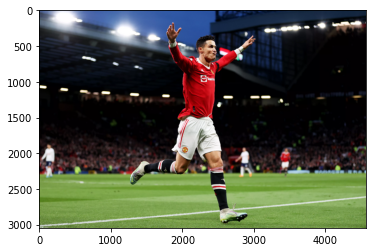

In [32]:
plt.imshow(content_img)
print(type(content_img))

Convert PIL   to Numpy array


In [33]:
content_img = tf.keras.preprocessing.image.img_to_array(content_img)
content_img = content_img / 255
content_img = np.expand_dims(content_img, axis=0)
type(content_img), content_img.shape

(numpy.ndarray, (1, 3044, 4565, 3))

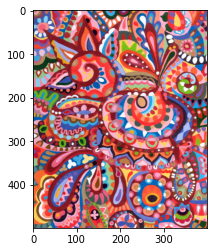

In [28]:
style_img = tf.keras.preprocessing.image.load_img('style1.jpg')
plt.imshow(style_img)

In [29]:
style_img = tf.keras.preprocessing.image.img_to_array(style_img)
style_img = style_img[tf.newaxis, :] / 255
type(style_img), style_img.shape

(numpy.ndarray, (1, 500, 400, 3))

#Model

In [45]:
content_layers = ['block4_conv2']
style_layers = ['block1_conv1','block2_conv1','block3_conv1','block4_conv1','block5_conv1']

In [50]:
def vgg_layers(layer_names):
  vgg = tf.keras.applications.VGG19(include_top=False,  weights='imagenet')
  vgg.trainable = False

  outputs = [vgg.get_layer(name).output for name in layer_names]
  network = tf.keras.Model(inputs=[vgg.input], outputs = outputs)
  return network

In [51]:
style_extractor = vgg_layers(style_layers)
style_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     